<a href="https://colab.research.google.com/github/KMMohiuddin/DATA_SCIENCE_Projects/blob/main/explore_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

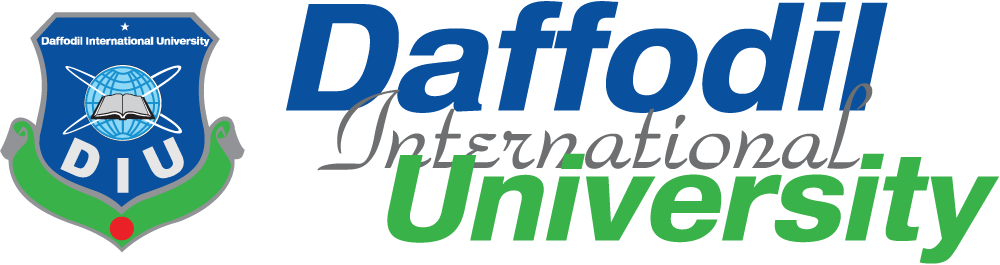


</br>
</br>

# LAB FINAL 

---

### <B> Machine Learning Driven Data Analysis I and Communicating Data Insights Lab </B> 
`Course Code: DS422`
</br>

</br>
</br>

<u> Submitted By: </u>
#### K. M. Mohiuddin
ID: 192-35-2894





SUPERVISED LEARNING
---

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pyplot as plt

# Step I: Download and extract the Iris dataset
iris = load_iris()
features = pd.DataFrame(iris.data, columns=iris.feature_names)
targets = pd.DataFrame(iris.target, columns=["Species"])



In [8]:

# II: Explore the datasets
print("Features shape:", features.shape)
print("Features data types:\n", features.dtypes)
print("Targets shape:", targets.shape)
print("Targets data types:\n", targets.dtypes)
print("Features dimensions:\n", features.head())

# Check for missing data
print("Missing data:\n", features.isnull().sum())


Features shape: (150, 4)
Features data types:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object
Targets shape: (150, 1)
Targets data types:
 Species    int64
dtype: object
Features dimensions:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Missing data:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


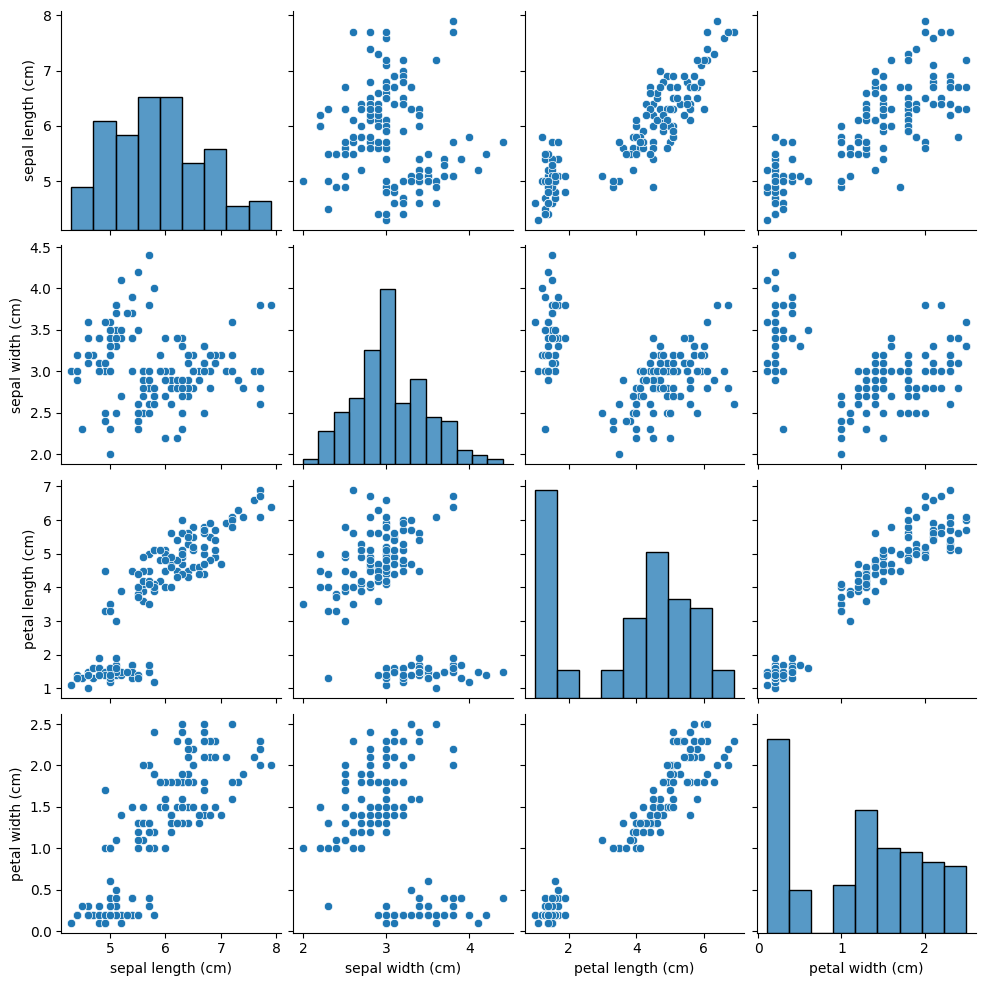

In [9]:

# III: Visualize the features
sns.pairplot(features)
plt.show()


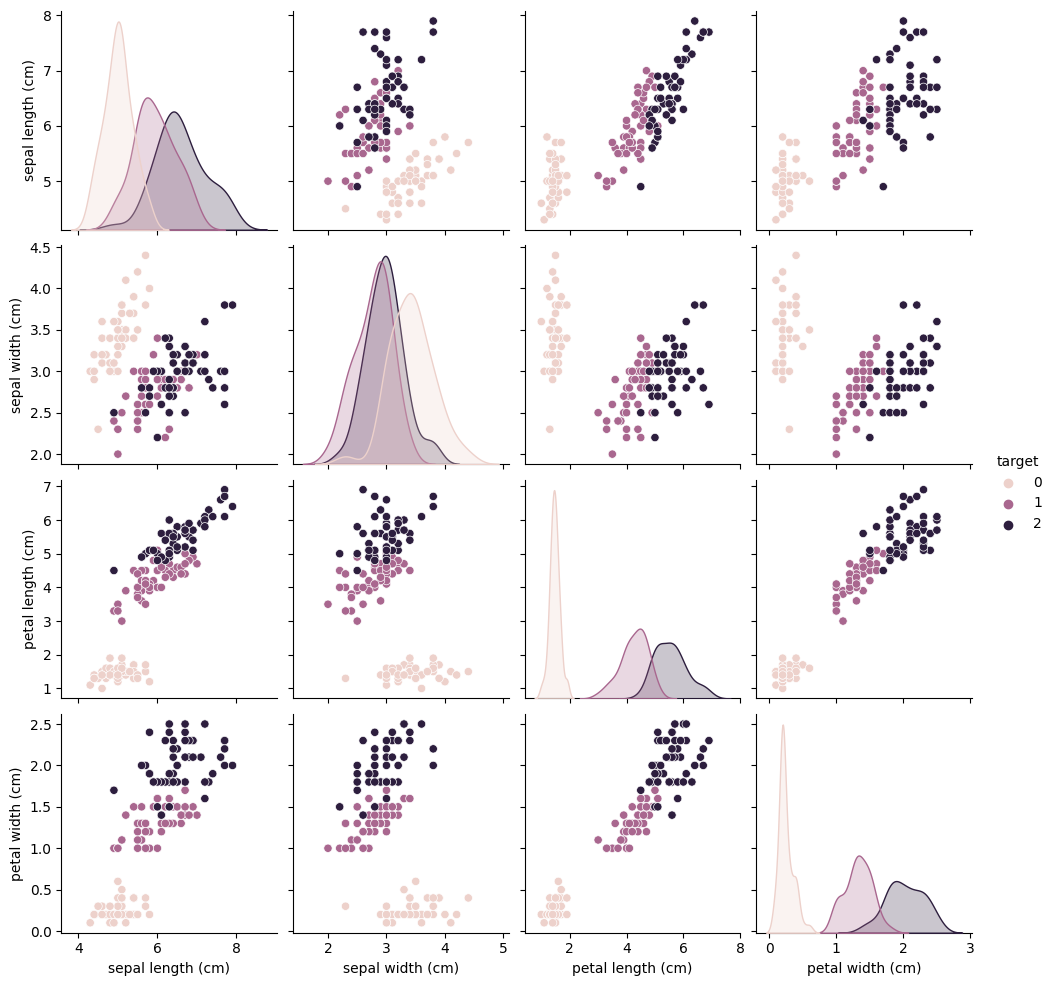

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

features = pd.DataFrame(iris.data, columns=iris.feature_names)
targets = pd.DataFrame(iris.target, columns=['target'])

# Combine features and targets into a single DataFrame
data = pd.concat([features, targets], axis=1)

# Pairplot to visualize the relationships between features and the target
sns.pairplot(data, hue='target')
plt.show()



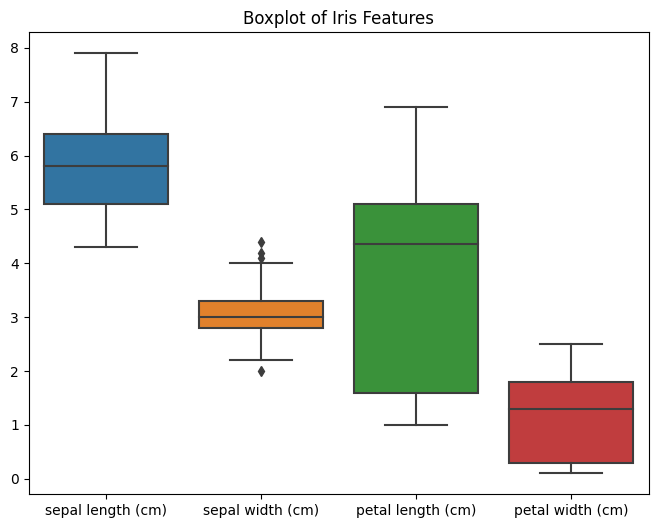

In [19]:

# Box plot to identify outliers in the features
plt.figure(figsize=(8, 6))
sns.boxplot(data=features)
plt.title('Boxplot of Iris Features')
plt.show()

In [10]:

#  IV: Preprocess the dataset
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:

#  V: Develop an Ensemble Model
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()

ensemble_model = VotingClassifier(estimators=[('lr', logreg), ('dt', dt), ('svc', svc), ('knn', knn), ('nb', nb)])


In [12]:

#VI: Hyperparameter tuning
parameters = {'lr__C': [0.1, 1, 10],
              'dt__max_depth': [None, 5, 10],
              'svc__C': [0.1, 1, 10],
              'knn__n_neighbors': [3, 5, 7],
              'nb__var_smoothing': [1e-09, 1e-08, 1e-07]}

grid_search = GridSearchCV(estimator=ensemble_model, param_grid=parameters, cv=5)
grid_search.fit(X_train_scaled, y_train.values.ravel())

best_model = grid_search.best_estimator_


In [13]:

# VII: Evaluate training performance
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')
    cm = confusion_matrix(y, y_pred)
    
    print("Confusion Matrix:\n", cm)
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

evaluate_model(best_model, X_train_scaled, y_train)


Confusion Matrix:
 [[40  0  0]
 [ 0 39  2]
 [ 0  1 38]]
Accuracy: 0.975
Precision: 0.975
Recall: 0.9751928288513655
F1 Score: 0.9749960931395529


In [14]:

#  VIII: Evaluate test performance
evaluate_model(best_model, X_test_scaled, y_test)

#  IX: Bootstrapping
n_iterations = 1000
n_size = int(len(X_train_scaled))

accuracy_scores = []
precision_scores = []
recall_scores = []

for _ in range(n_iterations):
    X_train_resampled, y_train_resampled = resample(X_train_scaled, y_train, n_samples=n_size, random_state=42)
    best_model.fit(X_train_resampled, y_train_resampled.values.ravel())
    y_pred = best_model.predict(X_test_scaled)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='macro'))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))

accuracy_mean = np.mean(accuracy_scores)
precision_mean = np.mean(precision_scores)
recall_mean = np.mean(recall_scores)

accuracy_ci = np.percentile(accuracy_scores, [2.5, 97.5])
precision_ci = np.percentile(precision_scores, [2.5, 97.5])
recall_ci = np.percentile(recall_scores, [2.5, 97.5])

print("Bootstrapping results:")
print("Accuracy Mean:", accuracy_mean)
print("Accuracy 95% CI:", accuracy_ci)
print("Precision Mean:", precision_mean)
print("Precision 95% CI:", precision_ci)
print("Recall Mean:", recall_mean)
print("Recall 95% CI:", recall_ci)



Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Bootstrapping results:
Accuracy Mean: 1.0
Accuracy 95% CI: [1. 1.]
Precision Mean: 1.0
Precision 95% CI: [1. 1.]
Recall Mean: 1.0
Recall 95% CI: [1. 1.]


In [15]:
# X: Compare training and test results
train_acc = accuracy_score(y_train, best_model.predict(X_train_scaled))
test_acc = accuracy_score(y_test, best_model.predict(X_test_scaled))

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Training Accuracy: 0.9583333333333334
Test Accuracy: 1.0


---
---

UNSUPERVISED LEARNING
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# I. Download the Iris dataset and extract features and targets
iris = load_iris()
df_features = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_targets = pd.DataFrame(data=iris.target, columns=['target'])


In [2]:

# II. Explore the datasets
print("Features Shape:", df_features.shape)
print("Targets Shape:", df_targets.shape)
print("\nFeatures Data Types:")
print(df_features.dtypes)
print("\nFeatures Dimensions:")
print(df_features.head())

# Check for missing data
print("\nMissing Data:")
print(df_features.isnull().sum())


Features Shape: (150, 4)
Targets Shape: (150, 1)

Features Data Types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

Features Dimensions:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Missing Data:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

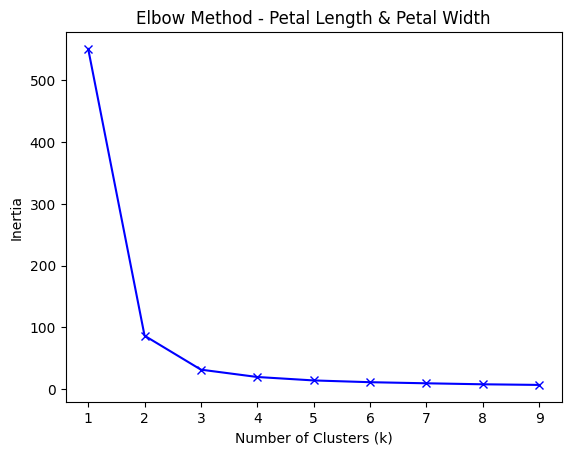

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


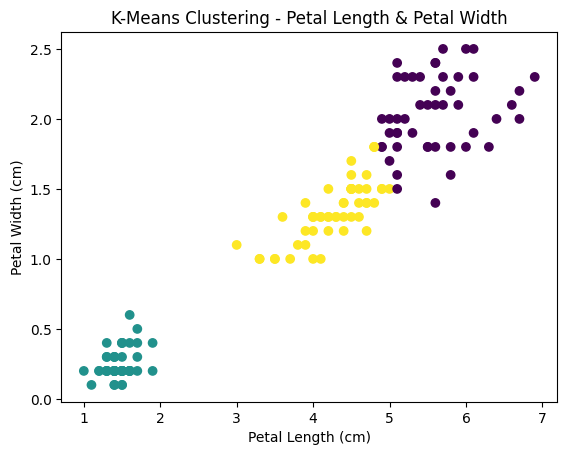

In [3]:

# IIIa. K-Means clustering using Petal Length and Petal Width
petal_data = df_features[['petal length (cm)', 'petal width (cm)']]
k_values = range(1, 10)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(petal_data)
    inertia.append(kmeans.inertia_)

# Plotting elbow curve
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Petal Length & Petal Width')
plt.show()

# Perform K-Means clustering with optimal k=3
kmeans_petal = KMeans(n_clusters=3, random_state=42)
kmeans_petal.fit(petal_data)
petal_labels = kmeans_petal.labels_

# Visualize clusters
plt.scatter(petal_data['petal length (cm)'], petal_data['petal width (cm)'], c=petal_labels, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clustering - Petal Length & Petal Width')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

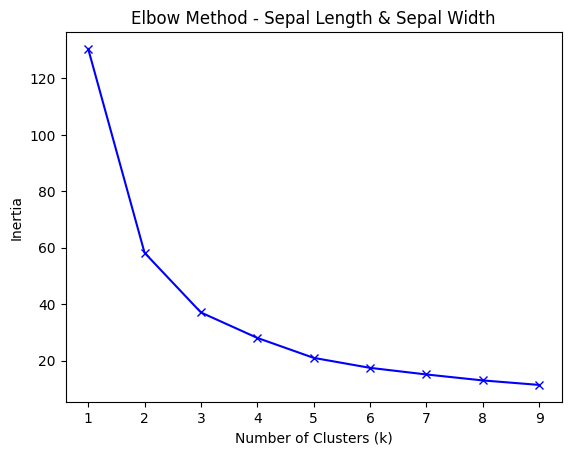

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


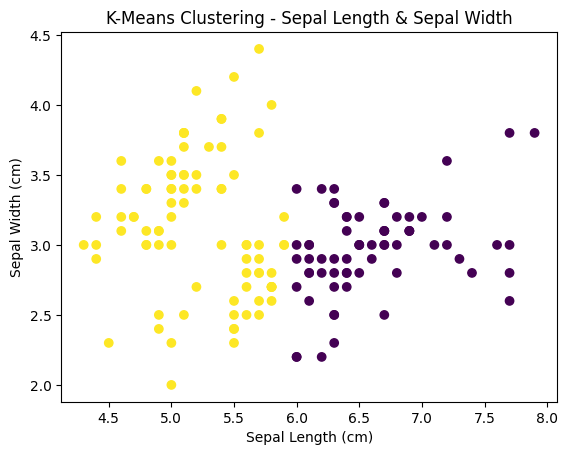

In [4]:

# IIIb. K-Means clustering using Sepal Length and Sepal Width
sepal_data = df_features[['sepal length (cm)', 'sepal width (cm)']]
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sepal_data)
    inertia.append(kmeans.inertia_)

# Plotting elbow curve
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Sepal Length & Sepal Width')
plt.show()

# Perform K-Means clustering with optimal k=2
kmeans_sepal = KMeans(n_clusters=2, random_state=42)
kmeans_sepal.fit(sepal_data)
sepal_labels = kmeans_sepal.labels_

# Visualize clusters
plt.scatter(sepal_data['sepal length (cm)'], sepal_data['sepal width (cm)'], c=sepal_labels, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering - Sepal Length & Sepal Width')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

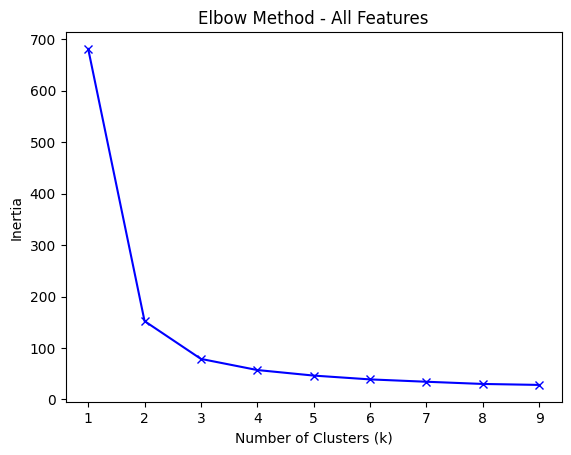

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:

# IIIc. K-Means clustering using all features
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_features)
    inertia.append(kmeans.inertia_)

# Plotting elbow curve
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - All Features')
plt.show()

# Perform K-Means clustering with optimal k=3
kmeans_all = KMeans(n_clusters=3, random_state=42)
kmeans_all.fit(df_features)
all_labels = kmeans_all.labels_


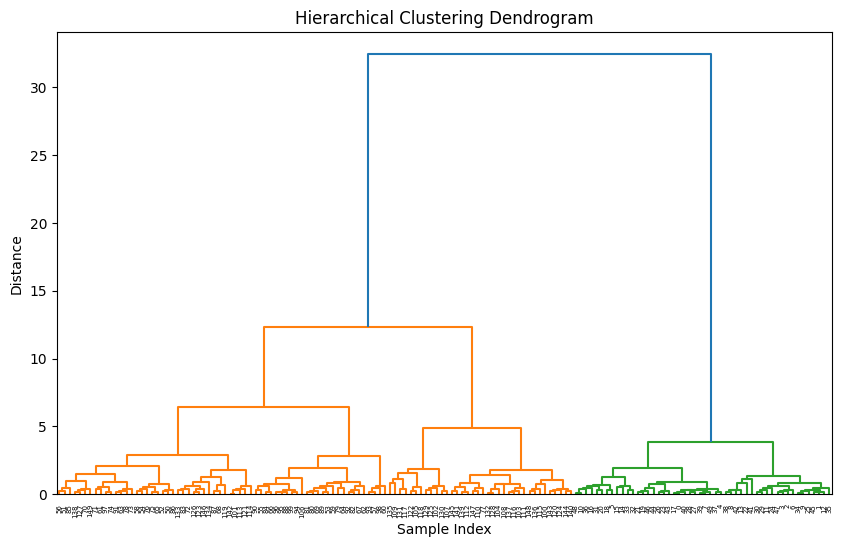

In [6]:

# IV. Hierarchical clustering
linked = linkage(df_features, 'ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



<u> V. Comparison between K-Means and Hierarchical clustering: </u>
</br></br>
 K-Means and Hierarchical clustering have their own strengths and weaknesses.
K-Means is a partition-based clustering algorithm that assigns each data point to a single cluster, and it assumes equal-sized and spherical clusters.
Hierarchical clustering, on the other hand, creates a hierarchy of clusters and does not assume equal-sized clusters.

 The choice between the two depends on the nature of the dataset and the desired outcome.
K-Means is computationally efficient and works well when the clusters are relatively well-separated and have a spherical shape.
 Hierarchical clustering is more flexible and can handle different cluster shapes, but it can be computationally expensive for large datasets.

 In this particular case, based on the plots and the elbow method, K-Means with k=3 seems to perform reasonably well for both the Petal and Sepal features.
 However, the clusters based on the Petal features seem to have a clearer separation and correlation with the target variable, as observed in the scatter plot.
